# Draft: Create a Mapping from 1-D Reduced Spectrum to 2-D Reduced Spectrum

In [83]:
import astropy.io.fits as fits
import matplotlib.pylab as plt
import numpy as np
import glob

In [84]:
list_1d_files = []
for file in glob.glob('/datag/blpd0/datax/apf/*'):
    if '.fits' in file and not 'ucb' in file:
        list_1d_files += [file]
        
list_2d_files = []
for file in glob.glob('/datag/blpd0/datax/apf/*'):
    if '.fits' in file and 'ucb' in file:
        list_2d_files += [file]

In [85]:
star = 'HIP79672'
spect_2d = ['/datag/blpd0/datax/apf/ucb-byk087.fits',
            '/datag/blpd0/datax/apf/ucb-byk088.fits',
            '/datag/blpd0/datax/apf/ucb-byk089.fits',
            '/datag/blpd0/datax/apf/ucb-apz216.fits'
           ]

spect_1d = ['/datag/blpd0/datax/apf/rbyk.087.fits',
            '/datag/blpd0/datax/apf/rbyk.088.fits',
            '/datag/blpd0/datax/apf/rbyk.089.fits',
            '/datag/blpd0/datax/apf/rapz.216.fits']

In [86]:
def find_location_of_closest_val(val, array):
    '''given a wavelength value, find the indicies that give its location in wl_image'''
    round_by = 7
    rounded_val = np.round(val, round_by)
    for sub_array in array:
        rounded_sub_array = np.round(sub_array, round_by)
        if rounded_val in rounded_sub_array:
            return(array.tolist().index(sub_array.tolist()), rounded_sub_array.tolist().index(rounded_val))

# H Alpha Line

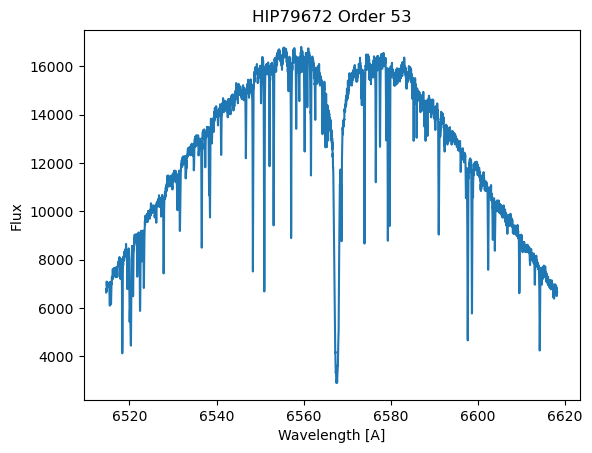

6567.513562296674


In [87]:
APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

apf_1d = fits.open(spect_1d[0])
image_1d = apf_1d[0].data

order = 53
wl = wl_image[order]
flux = image_1d[order]
fl = flux[1:]

plt.plot(wl[:-100], fl[:-100])
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title(star + ' Order ' + str(order))
plt.show()

H_alpha_wl = wl[np.argmin(fl[:-100])]
print(H_alpha_wl)

In [88]:
H_alpha_indicies = find_location_of_closest_val(H_alpha_wl, wl_image)
print('H_alpha_wl is located at ' + str(H_alpha_indicies) + ' in the wavelength array')
print('at ' + str(wl_image[H_alpha_indicies]) + str(' A'))

H_alpha_wl is located at (53, 2014) in the wavelength array
at 6567.513562296674 A


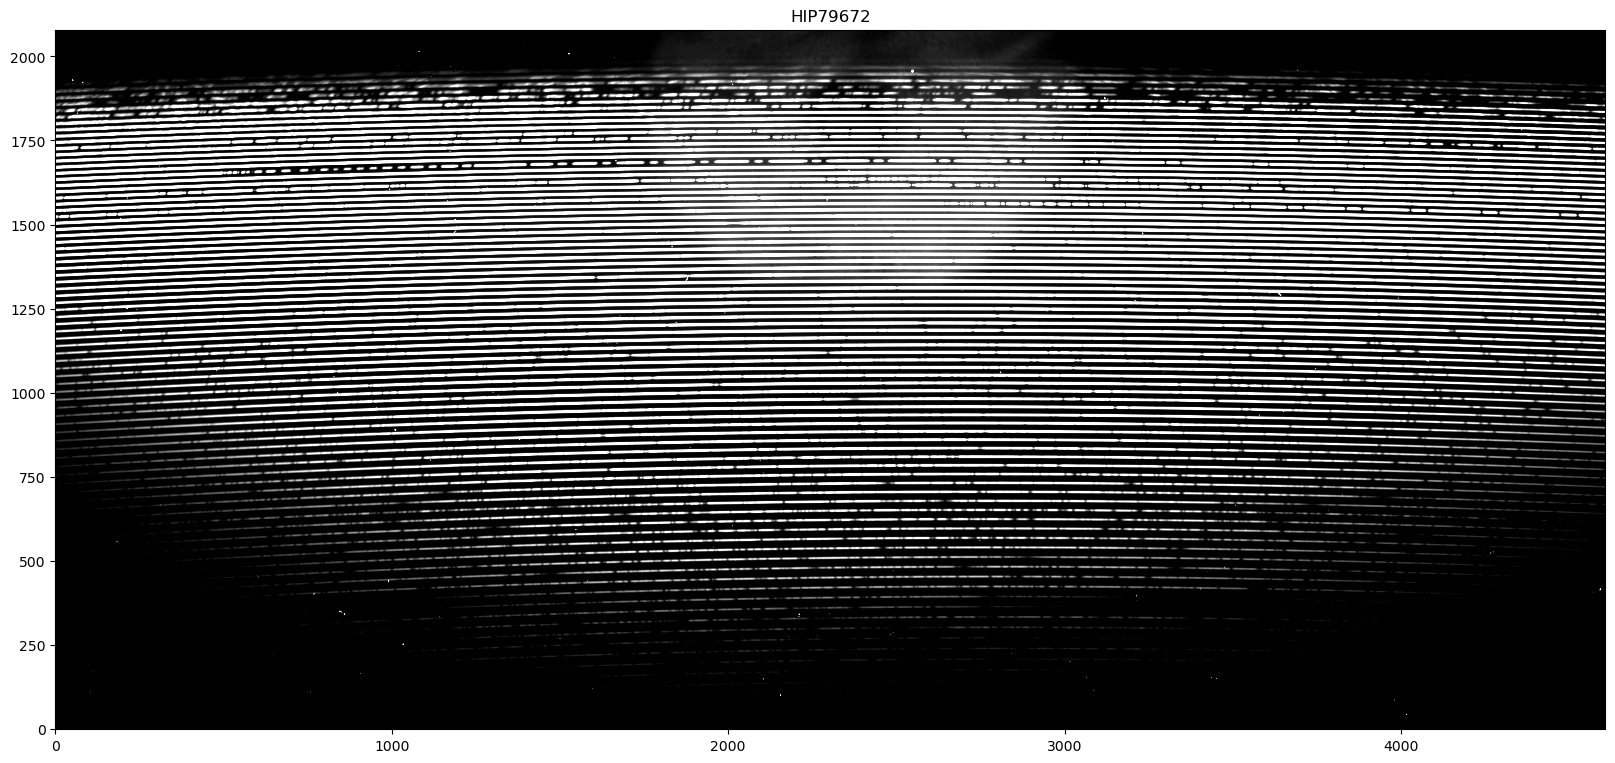

In [89]:
apf_2d = fits.open(spect_2d[0])
image_2d = apf_2d[0].data
image_rot = np.rot90(image_2d)
image_flip = np.fliplr(image_rot)
star = apf_2d[0].header['TOBJECT']


plt.figure(figsize=(20,20))
plt.imshow(image_flip, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title(star)
plt.show()

# h alpha is located at 2500, 900

In [96]:
wl_image[53][2000]

6514.692678833153

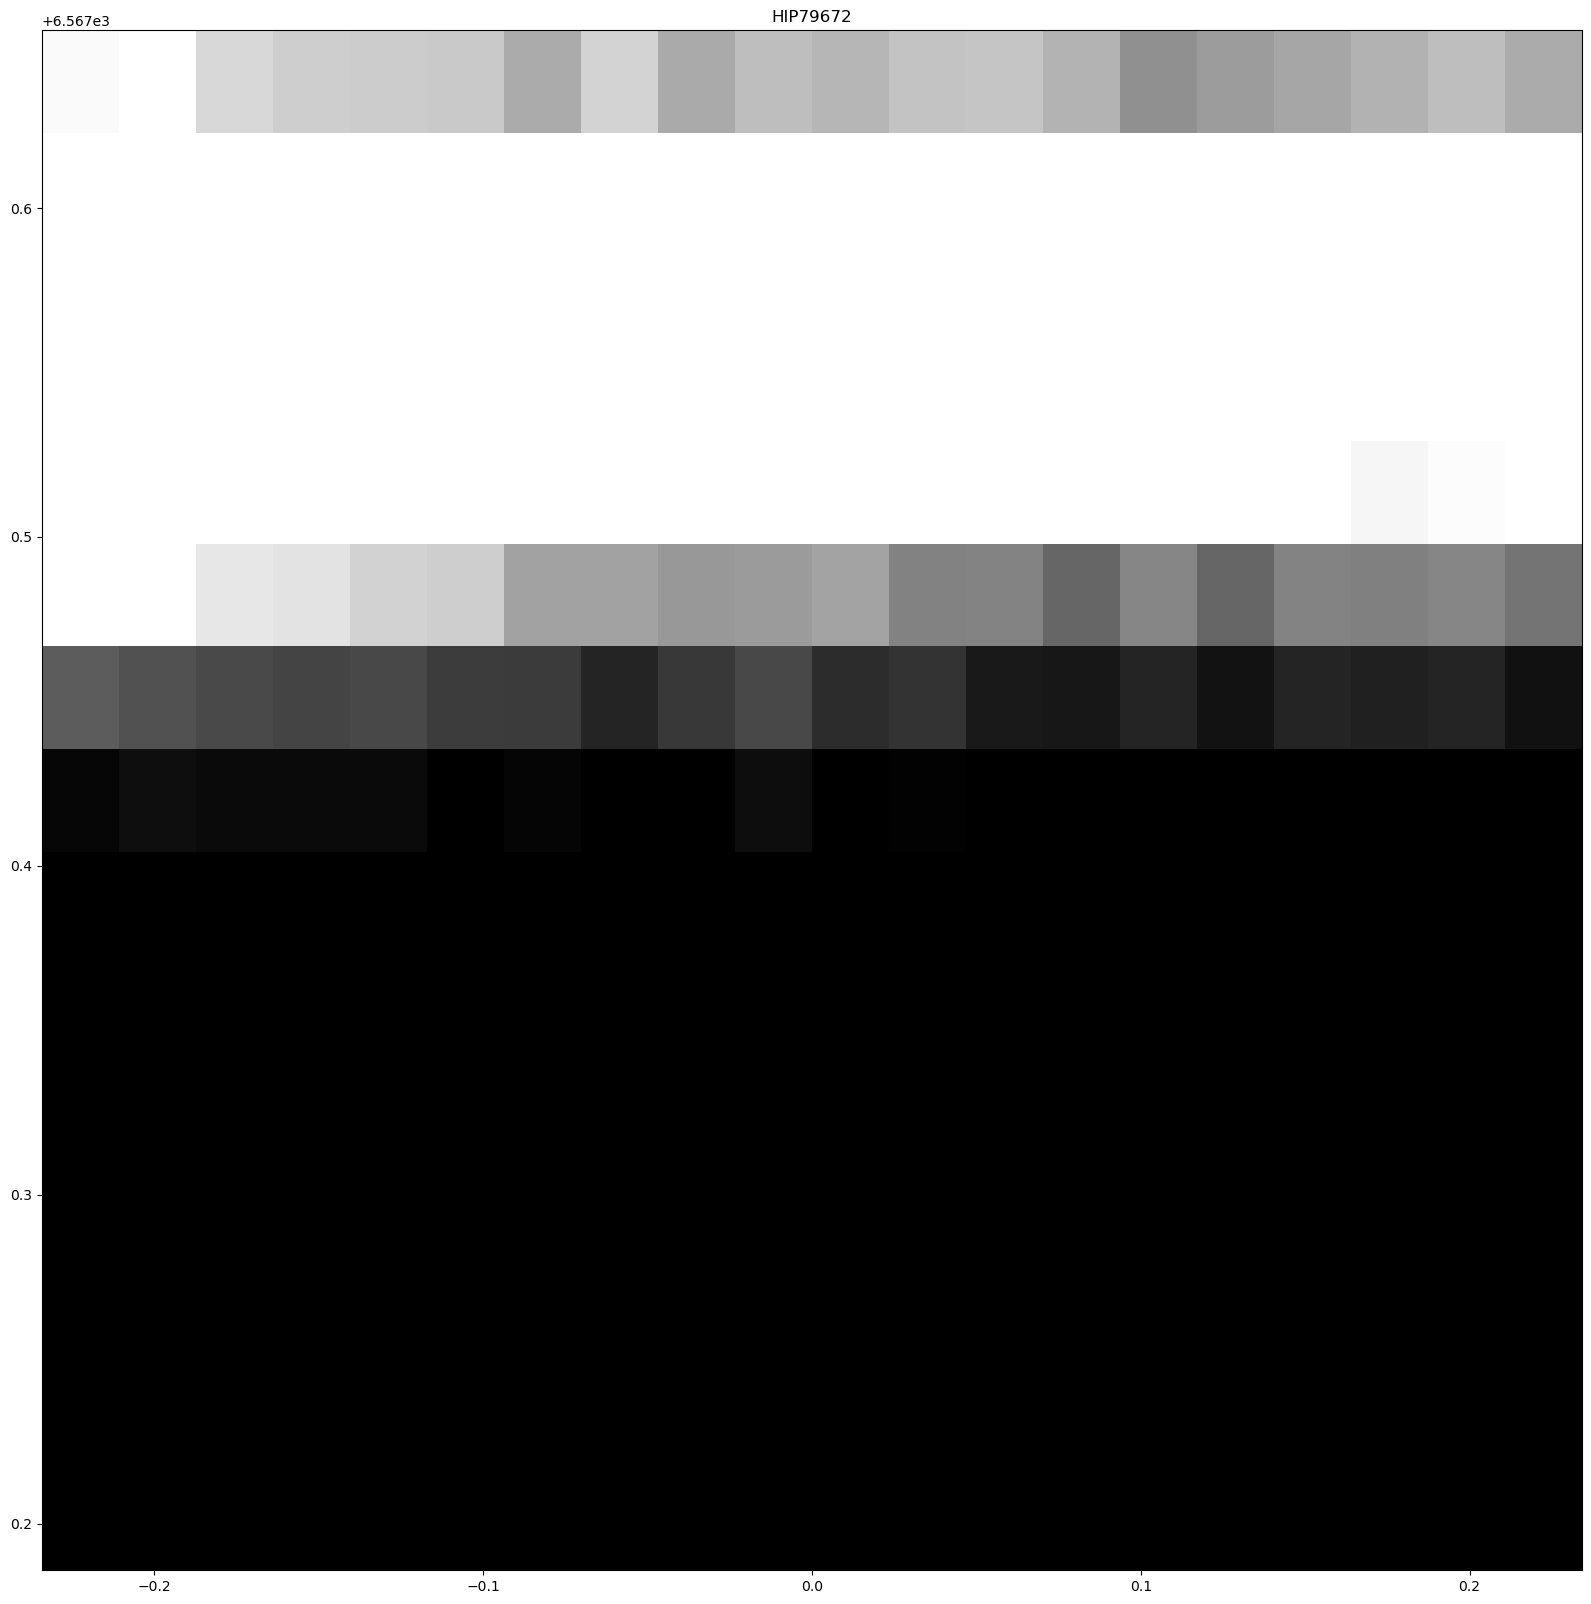

In [117]:
new_image = image_flip[1491:1506,2000:2020] 
# y coords, then x coords

# extent = [wl[53][2000],wl[53][2020],20,0]
extent = [wl_image[53][2000] - wl_image[53][2010], wl_image[53][2020]- wl_image[53][2010], wl_image[53][2000], wl_image[53][2020]]

plt.figure(figsize=(20,20))
plt.imshow(new_image, cmap = 'gray', 
           vmin = np.median(new_image), 
           vmax = np.median(new_image) * 1.2, origin = 'lower', 
           extent = extent)
plt.title(star)
plt.show()

In [122]:
order = 53
pixel = 4602

maximum = 4607

In [ ]:
lower_bound = pixel - 20
if lower_bound < 0:
    lower_bound = 0
    
upper_bound = pixel + 20
if upper_bound > 4606:
    upper_bound = 4606

In [123]:
extent = [wl_image[order][lower_bound] - wl_image[order][pixel], 
          wl_image[order][upper_bound]- wl_image[order][pixel], 
          wl_image[order][lower_bound] - wl_image[order][pixel], 
          wl_image[order][upper_bound]- wl_image[order][pixel]]

IndexError: index 4622 is out of bounds for axis 0 with size 4607

H_alpha_wl is located at 

1D (x, y) = (2014, 53)
2D (x, y) = (2014, 1501)

# Sodium D Line

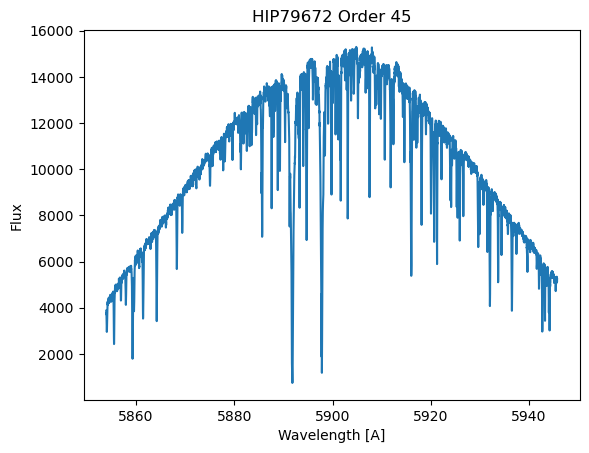

Na D Line is located at (45, 1607) in the wavelength array
at 5891.821160462765 A


In [58]:
order = 45
wl = wl_image[order]
flux = image_1d[order]
fl = flux[1:]

plt.plot(wl[:-100], fl[:-100])
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title(star + ' Order ' + str(order))
plt.show()

Na_D_wl = wl[np.argmin(fl[:-100])]

Na_D_indicies = find_location_of_closest_val(Na_D_wl, wl_image)
print('Na D Line is located at ' + str(Na_D_indicies) + ' in the wavelength array')
print('at ' + str(wl_image[Na_D_indicies]) + str(' A'))

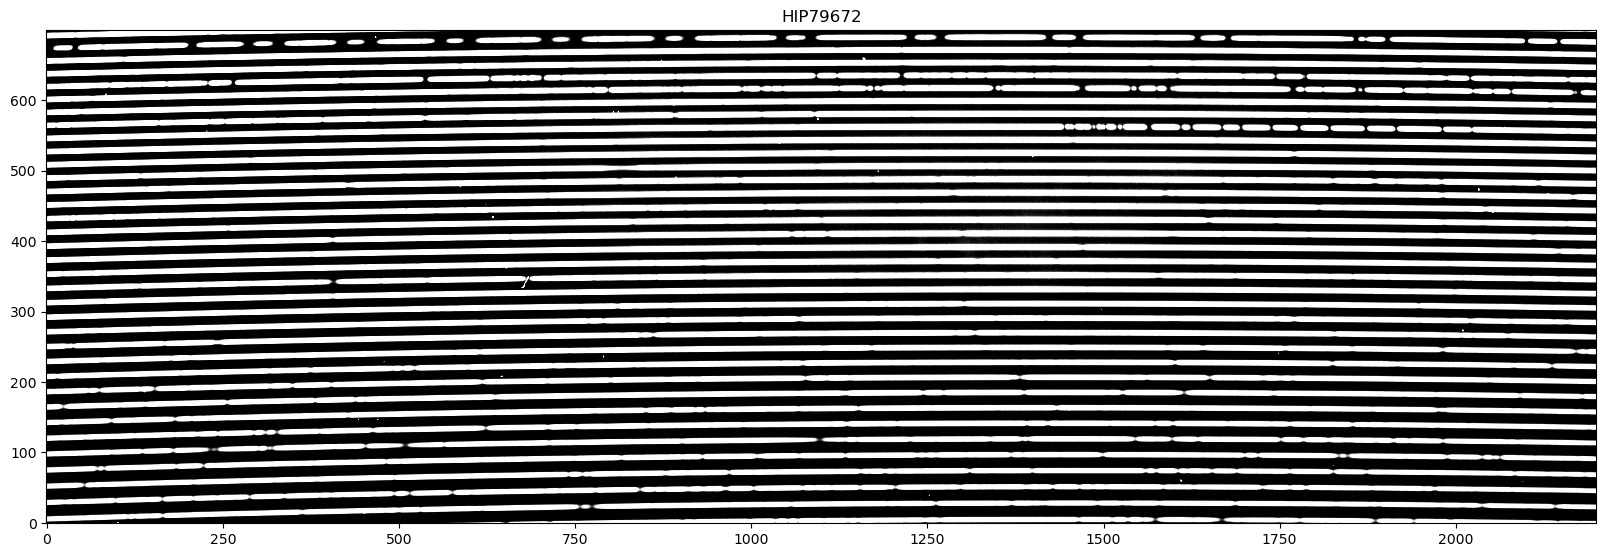

In [59]:
new_image = image_flip[1000:1700, 1200:3400]

# y coords, then x coords

plt.figure(figsize=(20,20))
plt.imshow(new_image, cmap = 'gray', 
           vmin = np.median(new_image), 
           vmax = np.median(new_image) * 1.2, origin = 'lower')
plt.title(star)
plt.show()

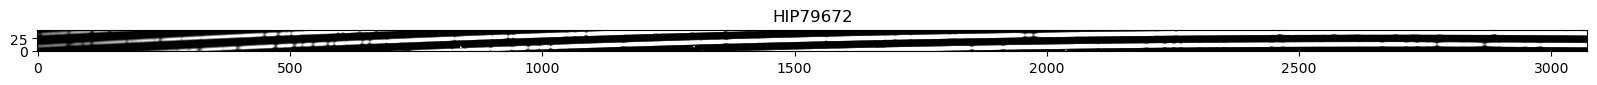

In [60]:
new_image = image_flip[992:1035, 0:3072]

# y coords, then x coords

plt.figure(figsize=(20,20))
plt.imshow(new_image, cmap = 'gray', 
           vmin = np.median(new_image), 
           vmax = np.median(new_image) * 1.2, origin = 'lower')
plt.title(star)
plt.show()

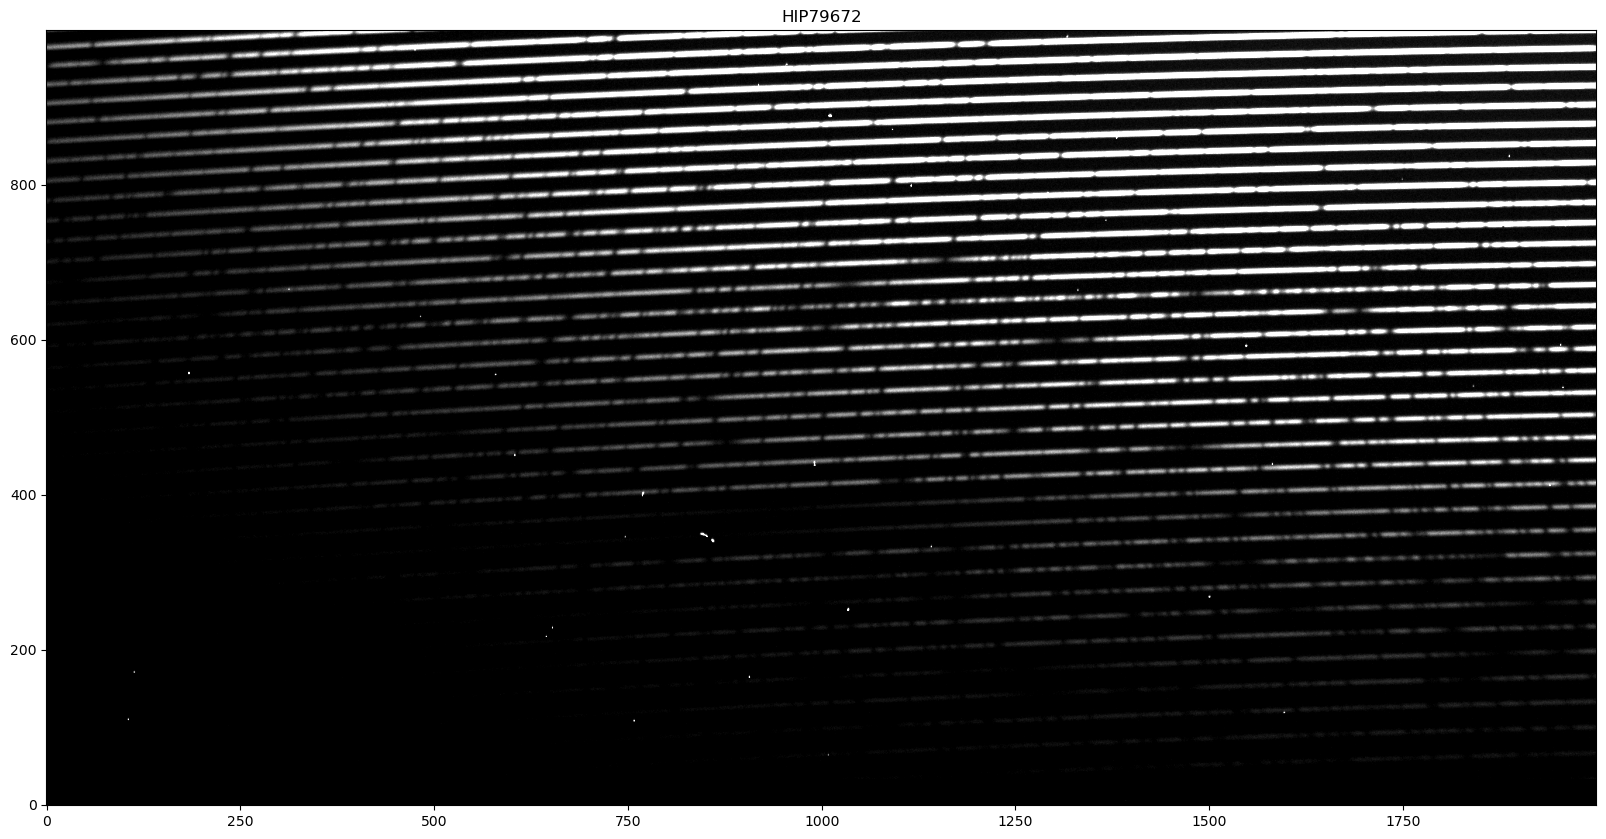

In [61]:
new_image = image_flip[0:1000, 0:2000]

# y coords, then x coords

plt.figure(figsize=(20,20))
plt.imshow(new_image, cmap = 'gray', 
           vmin = np.median(new_image), 
           vmax = np.median(new_image) * 1.2, origin = 'lower')
plt.title(star)
plt.show()

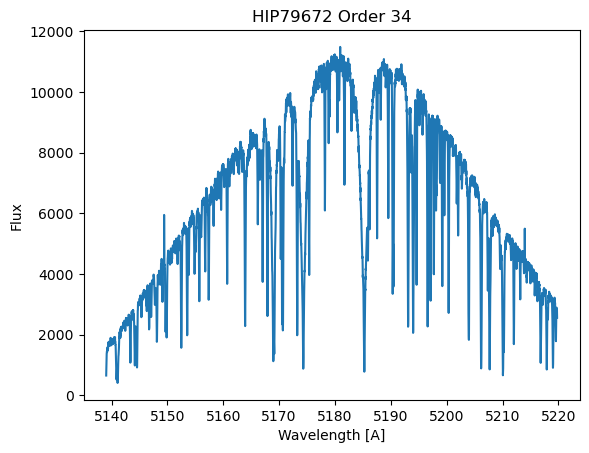

In [62]:
order = 34
wl = wl_image[order]
flux = image_1d[order]
fl = flux[1:]

plt.plot(wl[:-100], fl[:-100])
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title(star + ' Order ' + str(order))
plt.show()

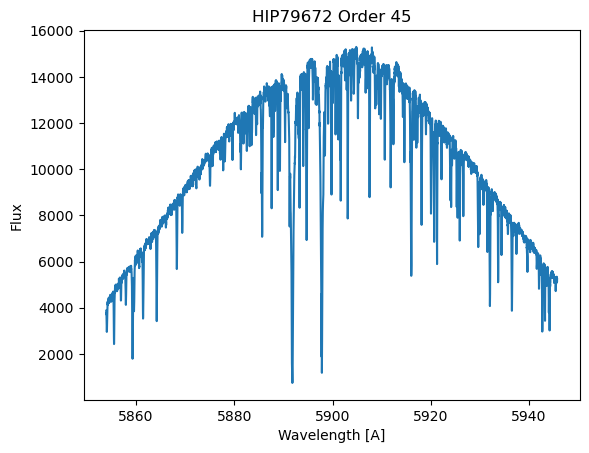

Na D Line is located at (45, 1607) in the wavelength array
at 5891.821160462765 A


In [63]:
order = 45
wl = wl_image[order]
flux = image_1d[order]
fl = flux[1:]

plt.plot(wl[:-100], fl[:-100])
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title(star + ' Order ' + str(order))
plt.show()

Na_D_wl = wl[np.argmin(fl[:-100])]

Na_D_indicies = find_location_of_closest_val(Na_D_wl, wl_image)
print('Na D Line is located at ' + str(Na_D_indicies) + ' in the wavelength array')
print('at ' + str(wl_image[Na_D_indicies]) + str(' A'))

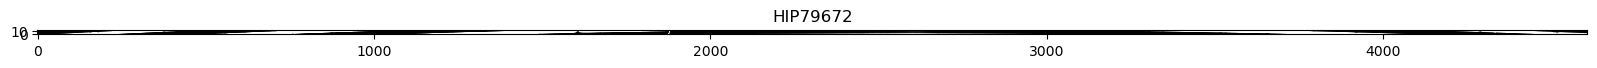

In [64]:
new_image = image_flip[1334:1348]

# y coords, then x coords

plt.figure(figsize=(20,20))
plt.imshow(new_image, cmap = 'gray', 
           vmin = np.median(new_image), 
           vmax = np.median(new_image) * 1.2, origin = 'lower')
plt.title(star)
plt.show()

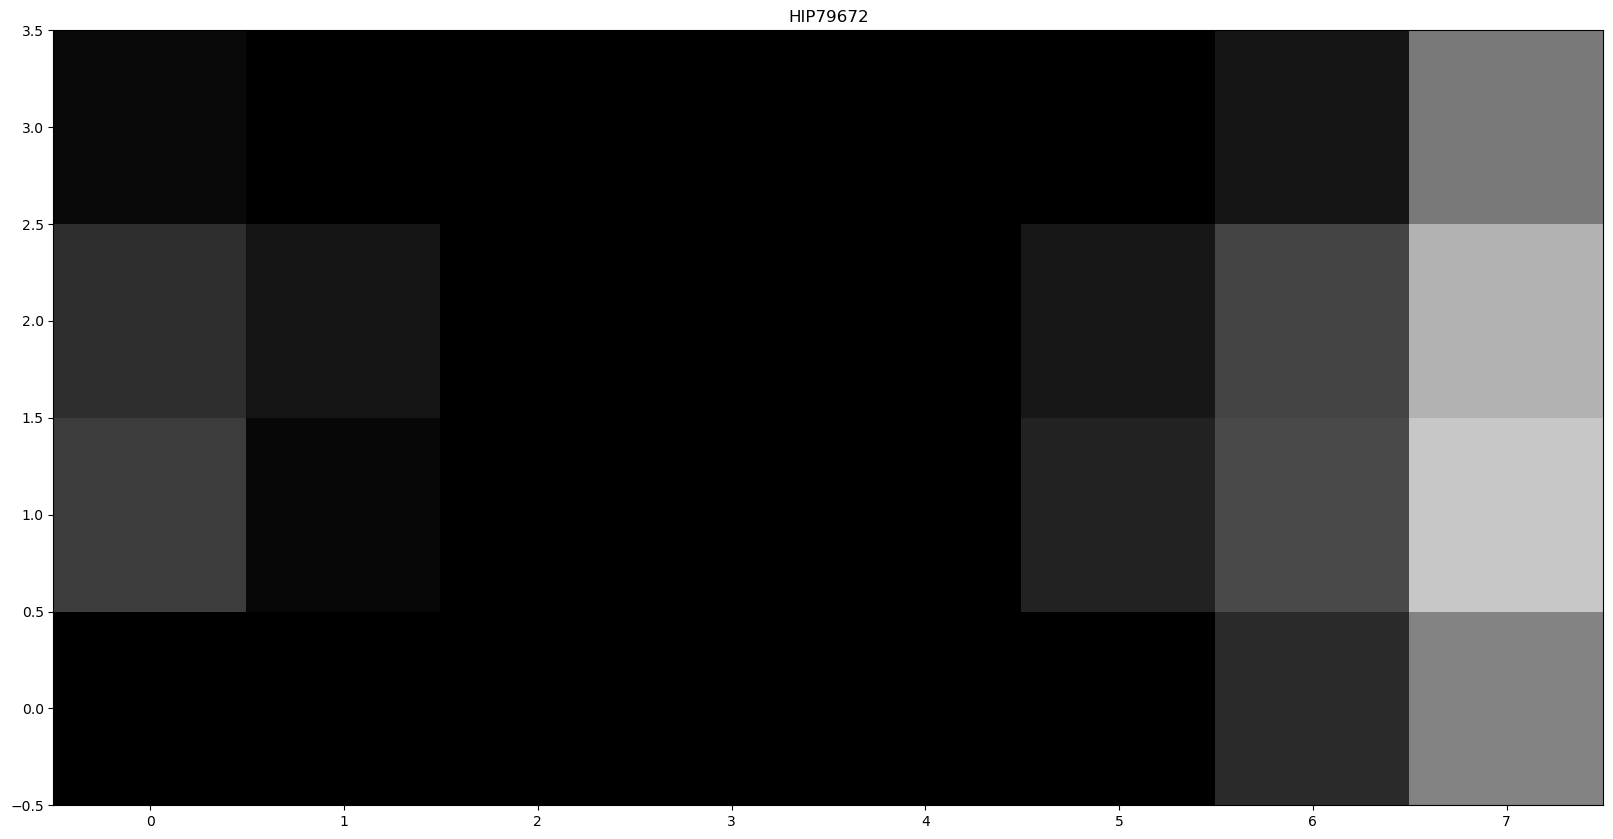

In [65]:
new_image = image_flip[1340:1344, 1605:1613]

# y coords, then x coords

plt.figure(figsize=(20,20))
plt.imshow(new_image, cmap = 'gray', 
           vmin = np.median(new_image), 
           vmax = np.median(new_image) * 1.2, origin = 'lower')
plt.title(star)
plt.show()

Na D Line is located at 

1D (x, y) = (45, 1607)
2D (x, y) = (1609, 1342)

# Oxygen Telluric Lines

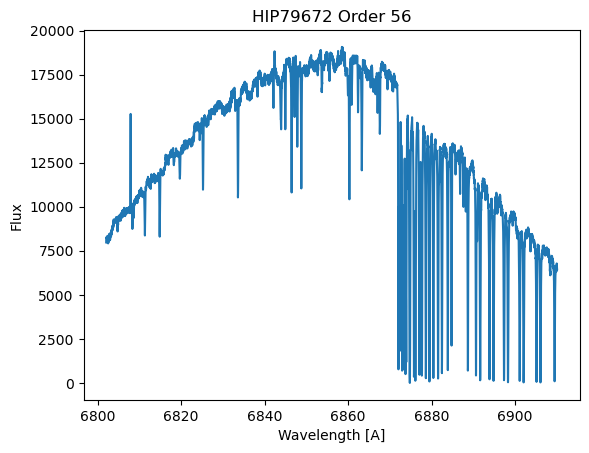

In [23]:
order = 56
wl = wl_image[order]
flux = image_1d[order]
fl = flux[1:]

plt.plot(wl[:-100], fl[:-100])
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title(star + ' Order ' + str(order))
plt.show()

# Na_D_wl = wl[np.argmin(fl[:-100])]

# Na_D_indicies = find_location_of_closest_val(Na_D_wl)
# print('Na D Line is located at ' + str(Na_D_indicies) + ' in the wavelength array')
# print('at ' + str(wl_image[Na_D_indicies]) + str(' A'))

In [ ]:
# new_image = image_flip[1683:1688, 2200:2800]
new_image = image_flip[1680:1694, 500:]

# y coords, then x coords

plt.figure(figsize=(20,20))
plt.imshow(new_image, cmap = 'gray', 
           vmin = np.median(new_image), 
           vmax = np.median(new_image) * 1.2, origin = 'lower')
plt.title(star)
plt.show()

# Convert to 2-D Spect

In [77]:
pwd

'/mnt_home/zoek/code/APF-BL-DAP/Zoe'

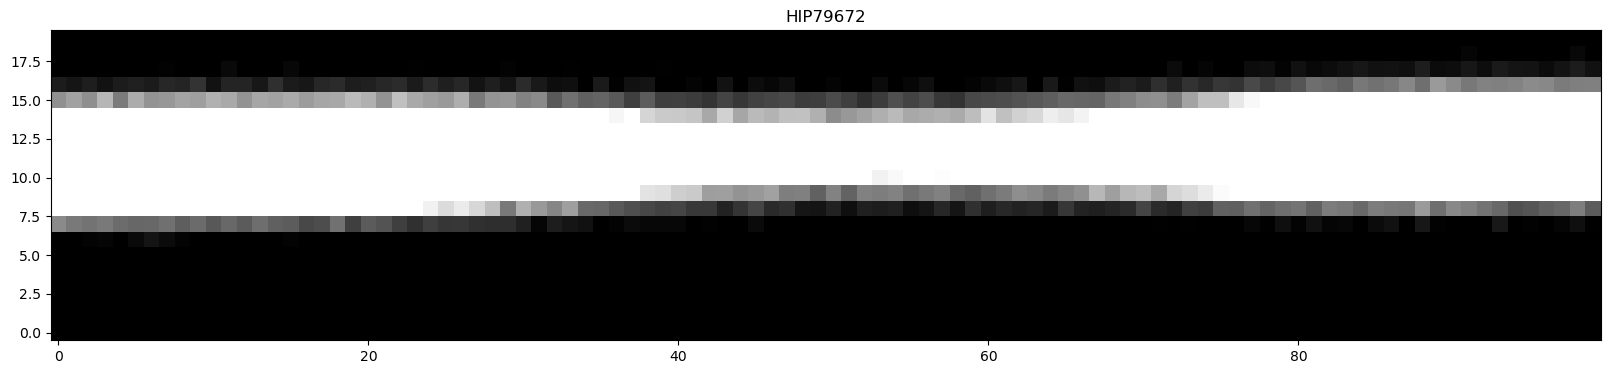

In [82]:
order = 53
pixel = 2014

text = open('/mnt_home/zoek/code/APF-BL-DAP/Zoe/SpectraMapping/order_coefficients.txt', "r")
lines = text.read().splitlines()
coeff_array = np.zeros((79,5))
for i in range(len(lines)):
    a0 = float(lines[i][6:13].strip())
    a1 = float(lines[i][17:26].strip())
    a2 = float(lines[i][27:39].strip())
    a3 = float(lines[i][40:52].strip())
    a4 = float(lines[i][54:].strip())
    coeffs_one_line = np.array([a0,a1,a2,a3,a4])
    coeff_array[i] += coeffs_one_line
    

a0 = coeff_array[order,0]
a1 = coeff_array[order,1]
a2 = coeff_array[order,2]
a3 = coeff_array[order,3]
a4 = coeff_array[order,4]

y = a0 + a1*pixel + a2*pixel**2 + a3*pixel**3 + a4*pixel**4
y = int(y)

new_image = image_flip[y-10:y+10,pixel-50:pixel+50] 
# y coords, then x coords

plt.figure(figsize=(20,20))
plt.imshow(new_image, cmap = 'gray', 
           vmin = np.median(new_image), 
           vmax = np.median(new_image) * 1.2, origin = 'lower')
plt.title(star)
plt.show()

# Remove Blaze Function from 2-D Spectra

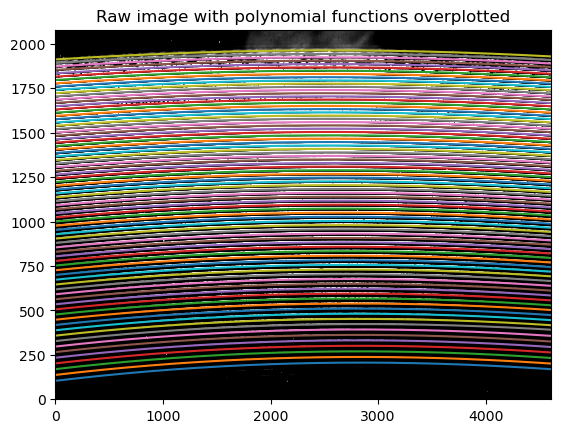

In [32]:
text = open('order_coefficients.txt', "r")
lines = text.read().splitlines()
coeff_array = np.zeros((79,5))
for i in range(len(lines)):
    a0 = float(lines[i][6:13].strip())
    a1 = float(lines[i][17:26].strip())
    a2 = float(lines[i][27:39].strip())
    a3 = float(lines[i][40:52].strip())
    a4 = float(lines[i][54:].strip())
    coeffs_one_line = np.array([a0,a1,a2,a3,a4])
    coeff_array[i] += coeffs_one_line
    
# Plots raw image
plt.imshow(image_flip, cmap = "gray", origin = "lower", 
        aspect = "auto", vmin = np.median(image_flip), 
        vmax = np.median(image_flip) *1.1)
#Sets array of x values, which the polynomials can then be plotted with
x = np.arange(0,4608)
#Plots each polynomial function over the raw image
for i in range(coeff_array[:,0].size):
    a0 = coeff_array[i,0]
    a1 = coeff_array[i,1]
    a2 = coeff_array[i,2]
    a3 = coeff_array[i,3]
    a4 = coeff_array[i,4]
    #Plots each order of coefficients to fit a fourth-degree polynomial
    plt.plot(x, a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4)
    #Sets the limit on the x-axis and the y-axis shown in the plots
    plt.xlim(0,4608)
    plt.ylim(0,2080)
plt.title("Raw image with polynomial functions overplotted")
plt.show()

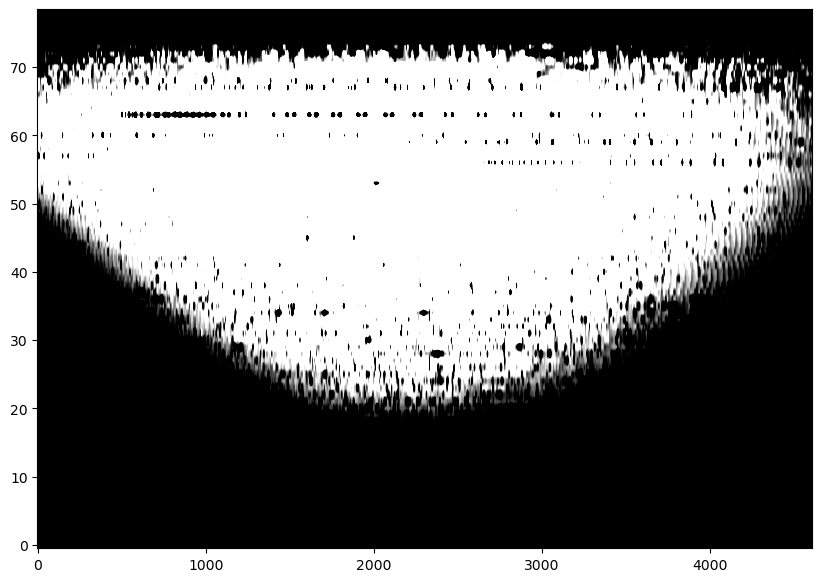

In [33]:
#Array of increasing x values
x = np.arange(0, 4608).astype(float)
#Empty array to fill in with y values from polynomials
y_values = np.zeros((79,4608))
#Empty array to fill in to create our reduced spectrum
poly_reduced_image = np.zeros((79,4608))
#Iteration loop that adds y values to the y_values array and 
#adds pixel values to the reduced_image array
for i in range(coeff_array[:,0].size):
    a0 = coeff_array[i,0]
    a1 = coeff_array[i,1]
    a2 = coeff_array[i,2]
    a3 = coeff_array[i,3]
    a4 = coeff_array[i,4]
    for j in range(x.size):
        y = a0 + a1*x[j] + a2*x[j]**2 + a3*x[j]**3 + a4*x[j]**4
        y_values[i,j] = y
        y = int(round(y))
        #We sum the pixel with three pixels above and three pixels below to ensure that 
        #we're including all of the important pixels in our reduced image
        poly_reduced_image[i,j] = image_flip[y,j]
plt.figure(figsize=(10,7))
plt.imshow(poly_reduced_image, cmap = "gray", origin = "lower", 
    aspect = "auto", vmin = np.median(poly_reduced_image), 
    vmax = np.median(poly_reduced_image) *1.1)

plt.show()

In [34]:
poly_reduced_image[70, 4600]

2304.0

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(poly_reduced_image[53:54, 1900:2100], cmap = "gray", origin = "lower", 
    aspect = "auto", vmin = np.median(poly_reduced_image), 
    vmax = np.median(poly_reduced_image) *1.1)

plt.show()

In [ ]:
def closest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]
test = np.arange(5)
test_val = 3.3

In [ ]:
x = np.arange(0, 4608).astype(float)
y_vals = np.zeros((2080,4608))
deblazed_image = np.zeros((2080,4608))

for row in range(2080):
    which_coeff = closest(np.arange(79), row / 26)
    a0 = coeff_array[which_coeff,0]
    a1 = coeff_array[which_coeff,1]
    a2 = coeff_array[which_coeff,2]
    a3 = coeff_array[which_coeff,3]
    a4 = coeff_array[which_coeff,4]
    for j in range(4608):
        y = a0 + a1*x[j] + a2*x[j]**2 + a3*x[j]**3 + a4*x[j]**4
        y_vals[row,j] = y
        y = int(round(y))
        deblazed_image[row,j] = image_flip[y,j]